# Desarrollo del Proyecto Sprint 6

## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Paso 2

## Preparación de los datos

In [1]:
#Importe de librerías a usar en el desarrollo del proyecto:

import pandas as pd
import numpy as np
import json
import requests
import pprint
import time
import re
import seaborn as sns

from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
#Lectura del dataset como fuente de datos y creación del DataFrame a desarrollar:

df = pd.read_csv("datasets/games.csv")

In [3]:
#Revisión general de la información:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [5]:
df.sample(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12983,Bass Rise,PS,1999.0,Sports,0.03,0.02,0.00,0.00,NaN,NaN,NaN
641,Madden NFL 16,XOne,2015.0,Sports,2.08,0.08,0.00,0.26,84.0,6.1,E
2348,LEGO Indiana Jones 2: The Adventure Continues,PS3,2009.0,Action,0.47,0.29,0.00,0.13,70.0,7.1,E10+
10357,Naruto Shippuden: Naruto vs. Sasuke,DS,2008.0,Action,0.07,0.00,0.03,0.00,64.0,tbd,E10+
10684,"Warhammer 40,000: Dawn of War II - Chaos Rising",PC,2010.0,Strategy,0.08,0.01,0.00,0.01,NaN,NaN,NaN
1625,SpongeBob SquarePants: Battle for Bikini Bottom,GBA,2003.0,Platform,0.88,0.33,0.00,0.02,NaN,7.3,E
7384,The Chronicles of Narnia: Prince Caspian,DS,2008.0,Action,0.19,0.01,0.00,0.02,54.0,tbd,E10+
15172,Wrestle Kingdom 2: Pro Wrestling Sekai Taisen,PS2,2007.0,Fighting,0.00,0.00,0.02,0.00,NaN,NaN,NaN
8746,Dragon's Lair Trilogy,Wii,2010.0,Adventure,0.14,0.00,0.00,0.01,NaN,NaN,NaN
13191,Codename: Kids Next Door: Operation V.I.D.E.O....,GC,2005.0,Platform,0.04,0.01,0.00,0.00,58.0,tbd,E10+


## Revisión preliminar de los datos:

A través de la revisión inicial de la información podemos obtener lo siguiente:

1. Existen 16715 registros (filas) en el dataframe df.

2. Existen 11 columnas, de las cuales 5 de ellas contienen registros No nulos en todas sus filas. 6 columnas contienen registros nulos.

3. 6 filas contienen registros de tipo numérico (float64) y el resto son tipo object.

### Consideraciones preliminares:

1. Los nombres de las columnas serán transformados a un formato snake_case y pasado a minúsculas.

2. Se convertirán los datos en los tipos necesarios según sus registros.

3.  Se revisarán los casos de los registros nulos y datos duplicados. Se determinará dependiendo del tipo de información que maneje la columna, la decisión de rellenar los registros nulos con un dato específico (sea una palabra/letra que describa al registro, tener en cuenta medidas de estadística descriptiva: media, mediana y/o moda).

4. La columna Year_of_Release será revisada a través de una API, o si del nombre del videojuego se pueden descifrar los años de lanzamiento para los datos nulos. Y será cambiado a formato float64.

5. Se estandarizarán las columnas Critic_Score y User_Score para que manejen una igual escala de valoración y facilite el manejo de los datos.

#### Estandarización de columnas (snake_case):

In [6]:
#Los nombres de las columnas serán transformados a un formato snake_case y pasado a minúsculas:

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
#Se corregirán los nombres de las columnas a través de un bucle. Así se corregirán los datos independiente del 
#número de columnas almacenadas en el DataFrame:


revised_col_names = []  #---> Lista para almacenar los nombres de columnas corregidos


for old_name in df.columns:
    name_stripped = old_name.strip() #Eliminación de espacios en nombres de columnas
    name_lowered = name_stripped.lower() #Transformación de columnas a minúsculas
    revised_col_names.append(name_lowered)
    
#Reemplazo de nombres anteriores a nuevos:
df.columns = revised_col_names

print(df.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


#### Conversión de los tipos de dato según su información

In [8]:
#Revisión de los datos:

display(df.head(10))
display(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

En los tipos de datos, podemos ver que todos manejan una coherencia con sus registros almacenados EXCEPTO la columna user_score. Es por ello que será la única que por lo pronto cambiaremos su tipo de dato a float64:

In [9]:
#Para convertir los tipos de datos, podemos observar que la columna user_score, debería ser de tipo numérica, pero aparece como
#Object. Por lo cual revisaremos sus registros:

display(df['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
#Vemos que el registro 'tbd' (To Be Determined) es el que modifica la estructura numérica de los registros (adicional al hecho que los números
#están registrados como strings). Es por ello que debemos reemplazar estos registros usando replace y registrarlo como NaN
#a través de la librería de Numpy:

df['user_score'] = df['user_score'].replace('tbd', np.nan) #---> Reemplazo de valores a Nan


#Y ahora procederemos a registrarla como float:

df['user_score'] = df['user_score'].astype(float) #---> Reemplazo de valores a tipo Float64

display(df['user_score'])


0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

### Revisión de los casos de registros nulos y datos duplicados.

In [11]:
#Revisión de datos nulos en la columna name:

null_name = df[df['name'].isna()]
null_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
#En este caso usaremos la palabra 'Unknown' para reemplazar a los valores nulos, ya que no hay forma de identificar los juegos 
#de la consola de Genesis:

df['name'] = df['name'].fillna('Unknown')

df['name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
16715 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB


In [13]:
#El mismo caso para la columna genre:

null_genre = df[df['genre'].isna()]
null_genre

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
#Son los mismos registros que los vistos en 'name':

df['genre'] = df['genre'].fillna('Unknown')
df['genre'].isnull().sum()

0

In [15]:
#Para el caso de 'year_of_release' vemos que los datos nulos corresponden a 269 registros:

null_year_release = df[df['year_of_release'].isna()]
null_year_release

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
names_prueba = df[df['year_of_release'].isna()]

names_prueba['name'].nunique()


232

La columna 'name' tiene 269 registros nulos y 232 registros únicos una vez realizado el filtro de los datos nulos en la columna 'year_of_release'

#### Uso de una API para obtener los datos faltantes en la columna 'year_of_release'

Existe una base de datos en internet llamada [RAWG]('https://rawg.io/games') que almacena más de 800'000 videojuegos como base de datos en su página. A través de la consulta en su [documentación]('https://api.rawg.io/docs/) de la extracción de sus datos a partir de una API, podemos obtener los datos que de año de lanzamiento para cada videojuego. Sin embargo, es importante remarcar que esto puede traer ciertas limitaciones:

    - Acceso restringido a la información de la API.
    - Tiempos de respuesta prolongados.
    - Obtención incompleta de los datos debido a la gran cantidad de datos almacenada en la página.

De todos modos, utilizaremos este método para obtener la mayor cantidad de información real posible sobre los años de lanzamiento de videojuegos antes de realizar otro tipo de transformación en los datos faltantes. 

In [76]:
# Como primer paso, crearemos las variables url y api_key para crear el enlace final de donde extraeremos la información de RAWG:

url = 'https://api.rawg.io/api/games?key='  # ---> Ruta dada por RAWG para acceder a su API
api_key = '9b167199195f4152b0451f2dcb7d6461' # ---> Key dada por RAWG luego de crear mi usuario en la página de RAWG

api_url = url+api_key # ---> Ruta completa para acceder a la API según la documentación de RAWG

In [77]:
#Ahora procederemos a crear un bucle donde a partir de los datos obtenidos como JSON una vez generado el request en la api_url

cont = 0
empty_list = [] #Lista vacía creada para almacenar los videojuegos extraídos.


for i in range(1,100):
    params = {'apikey' : api_key, 
         'page_size': 50, 
         'page': i}
    responses = requests.get(api_url, params=params)
    time.sleep(1)
    if responses.status_code == 200:
        responses = responses.json()
        cont +=1
        print(cont)
        for item in responses['results']:    # ---> 'results' viene siendo la columna donde está almacenado el dato que queremos extraer
            empty_list.append((item['name'], item['released'])) # ---> 'name' y 'released' hace referencia a los nombres y los años de lanzamiento de los videojuegos
            
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


In [93]:
#Si imprimimos empty_list y la longitud de empty_list podemos ver el número de registros que empty list nos arrojó
display(empty_list)
display(len(empty_list))

[('Middle-earth: Shadow of War', '2017-09-27'),
 ('Batman: Arkham Asylum Game of the Year Edition', '2010-03-26'),
 ('SEGA Mega Drive and Genesis Classics', '2010-06-01'),
 ('Mafia II', '2010-08-24'),
 ('Heavy Rain', '2010-02-17'),
 ('Fallout', '1997-09-30'),
 ('Watch Dogs', '2014-05-27'),
 ('Psychonauts', '2005-04-01'),
 ('Far Cry 5', '2018-03-27'),
 ('Shadow of the Tomb Raider', '2018-09-14'),
 ('ARK: Survival Evolved', '2015-06-02'),
 ('Undertale', '2015-09-14'),
 ('INSIDE', '2016-06-28'),
 ('Unturned', '2014-07-07'),
 ('Warhammer: Vermintide 2', '2018-03-08'),
 ('Max Payne 3', '2012-05-15'),
 ('Saints Row IV', '2013-08-20'),
 ('The Darkness II', '2012-02-07'),
 ("Tom Clancy's Rainbow Six Siege", '2015-12-01'),
 ('Alien: Isolation', '2014-10-05'),
 ('Firewatch', '2016-02-08'),
 ('Sekiro: Shadows Die Twice', '2019-03-22'),
 ("Assassin's Creed Odyssey", '2018-10-05'),
 ('Metro Exodus', '2019-02-13'),
 ('Darksiders', '2010-01-27'),
 ("Assassin's Creed II", '2009-11-17'),
 ('Hitman 2', 

3840

En este caso se obtuvieron 3960 registros de información de la API de RAWG donde almacenamos una lista con 2 componentes: name y released. Cabe aclarar, que las fechas obtenidas están en formato string y almacenan la fecha completa de lanzamiento; sólo nos interesa el año. Por eso sólo extraeremos los 4 primeros valores que almacena

Sin embargo, si queremos contrastar los resultados obtenidos con los videojuegos faltantes del DataFrame original, debemos convertir a empty_list a un DataFrame para posteriormente crear un merge que nos permita corroborar los datos que se obtuvieron de la API

In [94]:
df_from_api = pd.DataFrame(data = empty_list, columns = ['name', 'year_of_release']) #---> Creación del Dataframe con nombres de columnas más apropiados a nuestro caso

df_from_api['year_of_release'] = df_from_api['year_of_release'].str[:4] #---> Extracción de los 4 primeros valores que almacena dicha columna

df_from_api['year_of_release'] = pd.to_numeric(df_from_api['year_of_release'], errors='coerce')

df_from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3840 non-null   object 
 1   year_of_release  3817 non-null   float64
dtypes: float64(1), object(1)
memory usage: 60.1+ KB


Una vez creado el Dataframe df_from_api vemos que no todos los 3960 registros contienen valores NO nulos. Ya podemos realizar un merge para cruzar la información con el DataFrame original

In [95]:
#En este caso, usaremos un merge tipo left, almacenando como DataFrame de base el DataFrame original df:

df_merged_with_api = df.merge(df_from_api, how = 'left', on='name')

display(df_merged_with_api)

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,re_exp_year,year_of_release_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54,2006.0,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24,1985.0,1985.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52,2008.0,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77,2009.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38,1996.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01,2016.0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01,2007,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01,2016.0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01,2003.0,NaN


Ahora procederemos a sustituir los nulos en la columna 'year_of_release_x' (nuestra columna de año de lanzamiento original) con 'year_of_release_y' (nuestra columna extraída de la API)

In [96]:
df_merged_with_api['year_of_release_x'] = df_merged_with_api['year_of_release_x'].fillna(df_merged_with_api['year_of_release_y']) #---> Rellenado de registros nulos con los hallados a través de la API

df_merged_with_api = df_merged_with_api.drop('year_of_release_y', axis='columns') #---> Eliminamos la columna 'year_of_release_y' porque ya no la necesitaremos más

df_merged_with_api = df_merged_with_api.rename(columns = {'year_of_release_x':'year_of_release'}) #---> Reasignamos el nombre original a la columna 'year_of_release_x' por 'year_of_release'

display(df_merged_with_api['year_of_release'].isnull().sum())


214

En este caso de los 269 registros nulos, a través de la consulta de la API, obtuvimos 55 registros; por lo cual al ver el número de nulos encontramos que aún quedan 214 datos nulos.

In [97]:
df = df_merged_with_api #Reutilizaremos el nombre original del DataFrame df

Como alternativa, podemos usar como año de lanzamiento los años que están descritos en el nombre del videojuego. Por ejemplo 'FIFA Soccer 2004' para PS2, asumir que su año de lanzamiento fue 2004.

Para ello utilizaremos la librería re y usar el método regular expresion.

In [98]:
#Definimos una función que recorra el DataFrame y usaremos match para buscar la expresión regular.

def extract_year(row):
    
    match = re.search(r'(\d{4})', row['name']) #---> Buscar 4 dígitos en el nombre del videojuego
    
    if match:
        return match.group(0) #Si el valor coincide con el regular expresion, extraemos los 4 dígitos.
    else:
        return row['year_of_release'] #Si no coincide, entonces asignamos el valor original registrado en la columna.
    
df['re_exp_year'] = df.apply(extract_year, axis=1) #---> Lo almacenamos en una nueva columna

In [99]:
#Ahora procederemos a llenar aquellos valores encontrados con los nulos en la columna 'year_of_release':

df['year_of_release'] = df['year_of_release'].fillna(df['re_exp_year'])

display(df[df['name']=='FIFA Soccer 2004']) #Utilizaremos FIFA Soccer 2004 como ejemplo

C:\Users\c_ort\AppData\Local\Temp\ipykernel_31612\468959610.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['year_of_release'] = df['year_of_release'].fillna(df['re_exp_year'])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,re_exp_year
377,FIFA Soccer 2004,PS2,2004.0,Sports,0.59,2.36,0.04,0.51,84.0,64.0,E,3.50,2004
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,82.0,E,0.78,2004
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,62.0,E,0.06,2004
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,79.0,E,0.05,2004


In [100]:
#Finalmente eliminamos la columna 're_exp_year':

df = df.drop('re_exp_year', axis='columns')

display(df['year_of_release'].isnull().sum())

214

Como podemos observar, luego de ejecutar la API, obtener la información y cruzar los datos con el dataset original; sólo se pudieron rellenar 55 registros de años de lanzamiento reales de la página de RAWG. Si queremos obtener mejores resultados, deberíamos entonces incrementar el range o aumentar el page_size en el bucle creado para extraer los datos de la API.

Sin embargo, tal y como se describió en las consideraciones iniciales; esto será un proceso limitado a los tiempos de respuesta, el acceso a la información (ya que se usó una versión gratuita) y engorroso (ya que no hay garantía que se obtendrán TODOS los datos faltantes).

Es por ello que el resto de datos nulos serán dejados como nulos, ya que usar un año de lanzamiento ajustado (como podría ser, completar los registros nulos con la mediana de la columna 'year_of_release') puede generar inconsistencias con la verdadera época de vigencia de las consolas y/o videojuegos.

Finalmente pasaremos 'year_of_release' a float64 (ya que actualmente está como Object).

In [101]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16501 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


#### Estandarización de columnas critic_score y user_score para obtener una escala igual de valoración

Con el fin de manejar una escala igual en las calificaciones de los videojuegos, multiplicaremos por 10 la columna 'user_score' y así poder analizar en la misma magnitud de la columna 'critic_score'

In [102]:
df['user_score'] = df['user_score']*10

display(df['user_score'])

0        800.0
1          NaN
2        830.0
3        800.0
4          NaN
         ...  
16710      NaN
16711      NaN
16712      NaN
16713      NaN
16714      NaN
Name: user_score, Length: 16715, dtype: float64

#### Aclaración de datos nulos almacenados en este punto

Dado el hecho que las columnas de críticas son las únicas que hasta este punto tienen registros nulos, cabe aclarar que así quedarán almacenados de ahora en adelante.

El hecho que critic_score o user_score no tengan registros, significa que no hay información al respecto. Sus datos son numéricos y quedarán almacenados como NaN (tampoco se registrarán como ceros, porque esto es una baja calificación y no hay certeza de que la crítica al videojuego haya sido negativa).

Finalmente, en la columna de rating, llenaremos los nulos con la palabra 'Unknown'

In [103]:
df['rating'] = df['rating'].fillna('Unknown')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16501 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


#### Datos  duplicados

In [105]:
#Finalmente revisaremos los casos de datos duplicados:

display(df.duplicated().sum()) #---> Revisión datos duplicados en TODO el dataframe

0

#### Aclaración de datos duplicados en las columnas

La existencia de datos duplicados en este punto, sobretodo en 'name' no interfiere en errores futuros porque un videojuego puede pertenecer a varias plataformas, a pesar de haber sido lanzado en el mismo año, o tener las mismas ventas y/o críticas.

### Columna de ventas totales

In [106]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

display(df['total_sales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

# Paso 3

## Análisis de los datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?



In [107]:
#Inicialmente agruparemos los videojuegos por año de lanzamiento para establecer el conteo del número de videojuegos inaugurados por año.

games_per_year = df.groupby('year_of_release')['name'].count().reset_index().rename(columns = {'name':'videogames_released'})

display(games_per_year)

display(games_per_year.describe())

,year_of_release,videogames_released
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


,year_of_release,videogames_released
count,38.000000,38.000000
mean,1998.500000,434.236842
std,11.113055,453.167676
min,1980.000000,1.000000
25%,1989.250000,24.750000
50%,1998.500000,314.000000
75%,2007.750000,736.750000
max,2017.000000,1429.000000


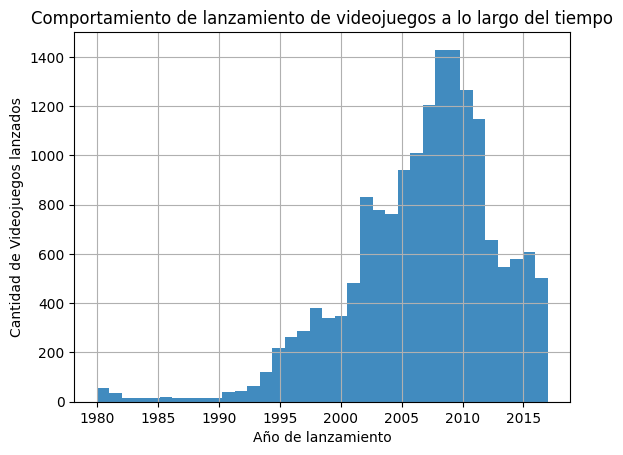

In [108]:
#Ahora crearemos un histograma que muestre el comportamiento de lanzamientos de videojuegos a lo largo del tiempo.

df.hist(column = 'year_of_release', bins = 36, alpha = 0.85)


plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de Videojuegos lanzados')
plt.title('Comportamiento de lanzamiento de videojuegos a lo largo del tiempo')

plt.show()

Dado el comportamiento de lanzamiento de los videojuegos, podemos ver que entre los años 1990 y 2000 empezó a subir el número de videojuegos lanzados por año. Teniendo un crecimiento considerable entre los años 2000 a 2010, llegando a un pico máximo en 2009 con 1429 videojuegos lanzados ese año.

###  ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

#### Variación de ventas de una plataforma a otra

In [109]:
#Como primera medida, agruparemos las sumas de ventas totales por plataforma:
revenues_per_platform = df.groupby('platform')['total_sales'].sum()

display(revenues_per_platform.sort_values(ascending=False))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

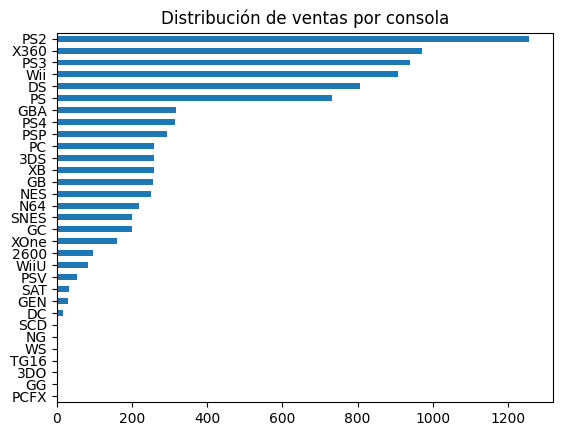

In [110]:
#Y procederemos ahora con un gráfico de barras que muestre la distribución de ventas por consola.

revenues_per_platform.sort_values(ascending=True).plot(kind= 'barh', title = 'Distribución de ventas por consola', ylabel='')


plt.show()

En este caso escogeremos las plataformas que hayan superado los 200 Millones de dólares en ventas como parámetro para definir su comportamiento a lo largo del tiempo. 

In [111]:
top_platforms = revenues_per_platform.reset_index()

top_platforms = top_platforms[top_platforms['total_sales'] >= 200]

display(top_platforms.sort_values(by='total_sales', ascending=False).reset_index(drop=True))
print(f'En total ', len(top_platforms), 'consolas superaron los 200 Millones de dólares')

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


En total  16 consolas superaron los 200 Millones de dólares


In [112]:
# Almacenaremos los nombres de las consolas que superaron los 200 Millones de dólares en ventas:

top_platforms['platform'].unique()

array(['3DS', 'DS', 'GB', 'GBA', 'N64', 'NES', 'PC', 'PS', 'PS2', 'PS3',
       'PS4', 'PSP', 'SNES', 'Wii', 'X360', 'XB'], dtype=object)

In [113]:
#top_16_platforms almacenará los nombres de las consolas a estudiar para luego buscarlas en el DataFrame original:

top_16_platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES']

In [114]:
#Ahora crearemos una pivot_table para agrupar la suma del total de ventas por consolas y año:

df_top_16_platforms = df[df['platform'].isin(top_16_platforms_list)][['year_of_release', 'platform', 'total_sales']]

pivot_top_16 = df_top_16_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

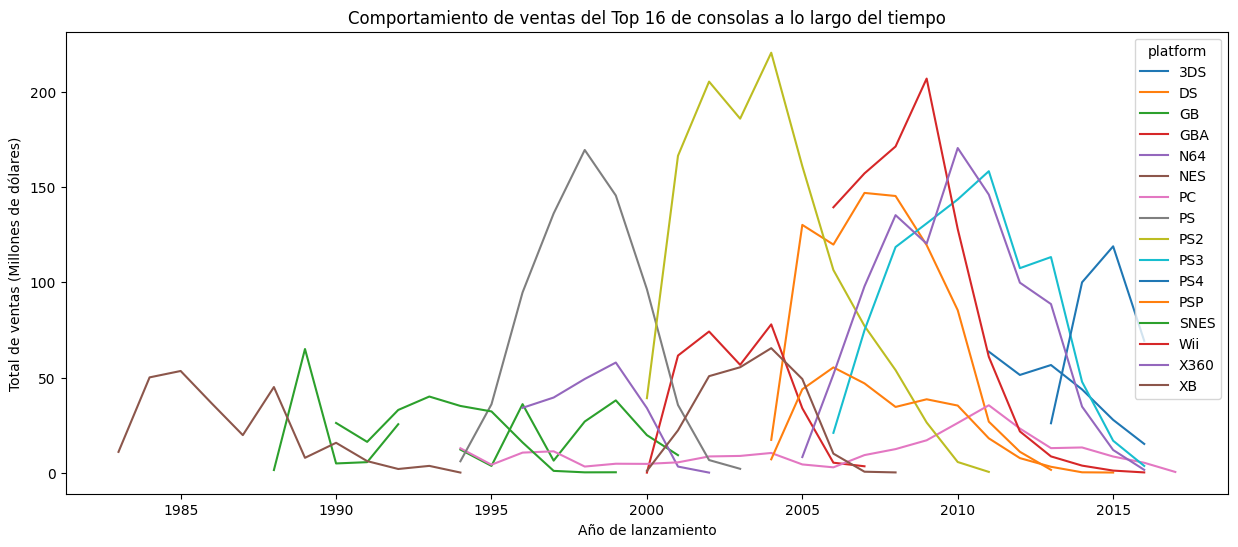

In [115]:
pivot_top_16.plot(kind='line', figsize = [15,6],  xlabel='Año de lanzamiento',
                        ylabel='Total de ventas (Millones de dólares)', title='Comportamiento de ventas del Top 16 de consolas a lo largo del tiempo')
                         


plt.show()

En el gráfico anterior podemos observar como hay un auge de ventas a mediados de los años noventas y empiezan a incrementar sus ventas, como lo son las plataformas PS y PS2. También vemos como la plataforma de PC destaca por sostener sus ventas a lo largo del tiempo sin dejar de vender a diferencia del resto.

### Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

#### Tiempo que tardan las plataformas nuevas en aparecer

In [116]:
#Para este caso, buscaremos los valores de año de lanzamiento asumiendo que el primer juego que aparezca para una consola/plataforma en los registros y que tenga el año más antiguo (osea el valor mínimo) y la almacenaremos en la variable
# platform_release como DataFrame:

platform_release = df.groupby('platform')['year_of_release'].min().sort_values(ascending=True).reset_index()

platform_release

,platform,year_of_release
0,2600,1980.0
1,NES,1983.0
2,DS,1985.0
3,PC,1985.0
4,GB,1988.0
5,SNES,1990.0
6,GEN,1990.0
7,GG,1992.0
8,SCD,1993.0
9,NG,1993.0


In [117]:
#Ahora agregaremos una nueva columna al DataFrame platform_release que almacene la diferencia entre los años de lanzamiento de las plataformas:

platform_release['year_gap_release'] = platform_release['year_of_release'].diff()


print(f"El tiempo promedio que tardan las plataformas nuevas en aparecer es: ", platform_release['year_gap_release'].mean())

El tiempo promedio que tardan las plataformas nuevas en aparecer es:  1.1


#### Tiempo que tardan las plataformas antiguas en desaparecer

In [118]:
#Para este caso toca almacenar los valores máximos y restarle los valores mínimos de año de lanzamiento para obtener los valores de duración por plataforma. Luego sacaremos el promedio de ese valor:

#Primero hallaremos los valores mínimos y máximos de lanzamiento por plataforma:

platform_min= df.groupby('platform')['year_of_release'].min()

platform_max = df.groupby('platform')['year_of_release'].max()


#Ahora procedemos a realizar la diferencia:

avg_platform_duration = (platform_max - platform_min).mean()


print("El tiempo promedio de duración de las plataformas es de:", round(avg_platform_duration, ndigits= 2), "años")

El tiempo promedio de duración de las plataformas es de: 7.65 años


### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

El periodo de tiempo a realizar el análisis para construir un modelo de pronóstico será de 1994 a 2016. Esto debido a que la mayoría de plataformas más importantes surgieron en este periodo de tiempo (teniendo en cuenta el histograma del comportamiento de lanzamiento de videojuegos y la columna 'videogames_release' de la variable games_per_year).

In [119]:
#Almacenaremos en un nuevo DataFrame los datos correspondientes a estos años:

df_1994_2016 = df[(df['year_of_release'] >= 1994) & (df['year_of_release'] < 2017)]

df_1994_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,800.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,830.0,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,800.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,850.0,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [120]:
#Como almacenamos el rango de años a analizar en df_1994_2016, lo usaremos para definir el top 10 de consolas que más ventas tuvieron:

top_10_platforms = df_1994_2016.groupby('platform')['total_sales'].sum().sort_values(ascending=False)[:10].reset_index()


#- ¿Qué plataformas son líderes en ventas?

print('Las plataformas líderes en ventas son las siguientes:')
display(top_10_platforms)

Las plataformas líderes en ventas son las siguientes:


,platform,total_sales
0,PS2,1248.40
1,X360,966.48
2,PS3,935.94
3,Wii,899.07
4,DS,803.76
5,PS,728.63
6,PS4,314.14
7,GBA,312.88
8,PSP,290.84
9,3DS,258.21


¿Cuáles crecen y cuáles se reducen?



In [121]:
#Ahora almacenaremos los nombres de las plataformas:

top_10_platforms['platform'].unique()

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

In [122]:
top_10_platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


In [123]:
df_top_10_platforms = df_1994_2016[df_1994_2016['platform'].isin(top_10_platforms_list)][['year_of_release', 'platform', 'total_sales']]

pivot_top_10 = df_top_10_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')


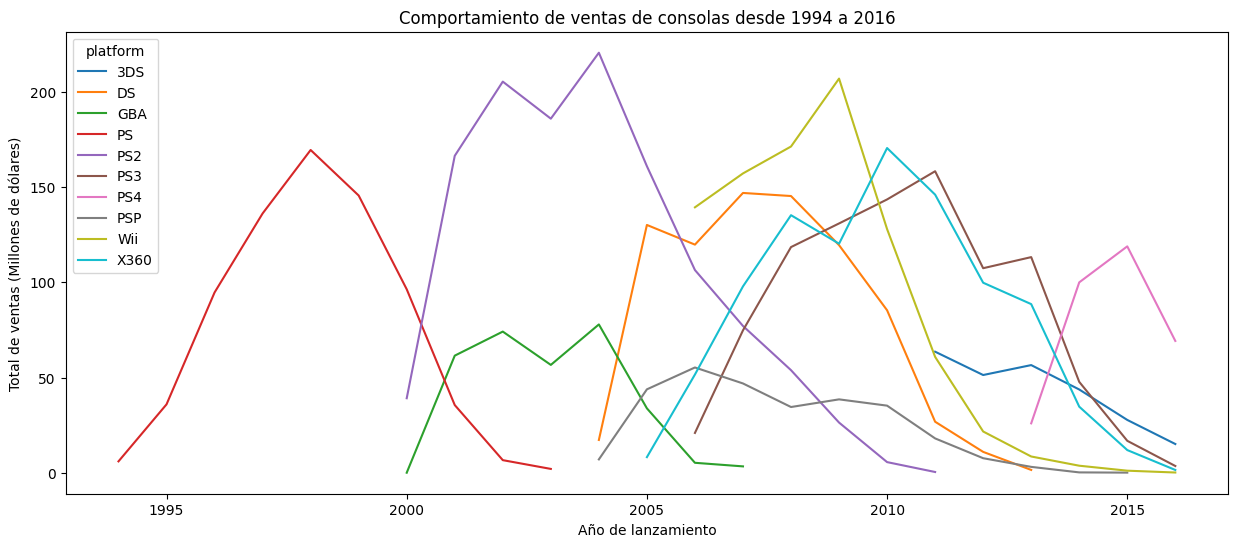

In [124]:
pivot_top_10.plot(kind='line', figsize = [15,6], xlabel='Año de lanzamiento',
                        ylabel='Total de ventas (Millones de dólares)', title='Comportamiento de ventas de consolas desde 1994 a 2016')


plt.show()

Se destaca el auge que tuvieron las plataformas como PS, PS2, Wii, X360, PS3, DS y PS4.

Como se muestra en la gráfica, las plataformas tienden a tener un auge de popularidad en sus ventas y llegan a un pico de ventas y luego decaen. Esto puede obedecer al hecho que las nuevas tecnologías que van saliendo gozan de mayor popularidad además que las plataformas empiezan a quedar obsoletas. Casos como el de PS a PS2, PS2 a PS3, y PS3 a PS4 (plataformas de la familia Sony) muestran que existe un recambio generacional en tecnología y se ve reflejado en el número de ventas totales (a medida que decae la antigua, la nueva se incrementa).

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? - ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

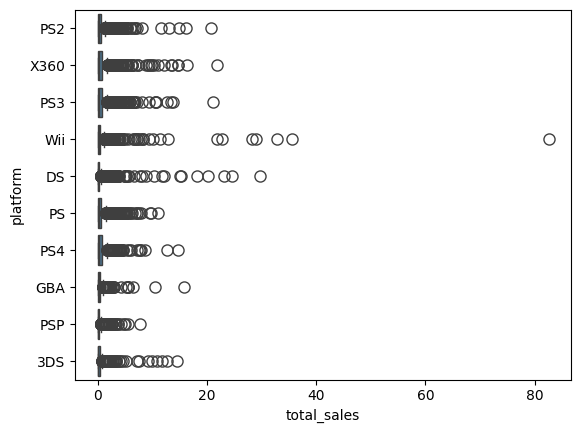

Plataforma:  PS2


count    2135.000000
mean        0.584731
std         1.143958
min         0.000000
25%         0.080000
50%         0.240000
75%         0.560000
max        20.810000
Name: total_sales, dtype: float64

Plataforma:  X360


count    1243.000000
mean        0.777538
std         1.626436
min         0.010000
25%         0.110000
50%         0.280000
75%         0.770000
max        21.820000
Name: total_sales, dtype: float64

Plataforma:  PS3


count    1313.000000
mean        0.712826
std         1.399828
min         0.000000
25%         0.110000
50%         0.280000
75%         0.760000
max        21.050000
Name: total_sales, dtype: float64

Plataforma:  Wii


count    1290.000000
mean        0.696953
std         3.161002
min         0.010000
25%         0.090000
50%         0.190000
75%         0.500000
max        82.540000
Name: total_sales, dtype: float64

Plataforma:  DS


count    2123.000000
mean        0.378596
std         1.435379
min         0.010000
25%         0.050000
50%         0.110000
75%         0.270000
max        29.800000
Name: total_sales, dtype: float64

Plataforma:  PS


count    1191.000000
mean        0.611780
std         1.056439
min         0.010000
25%         0.110000
50%         0.260000
75%         0.660000
max        10.950000
Name: total_sales, dtype: float64

Plataforma:  PS4


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

Plataforma:  GBA


count    811.000000
mean       0.385795
std        0.899654
min        0.010000
25%        0.055000
50%        0.160000
75%        0.390000
max       15.840000
Name: total_sales, dtype: float64

Plataforma:  PSP


count    1197.000000
mean        0.242974
std         0.521438
min         0.010000
25%         0.030000
50%         0.090000
75%         0.230000
max         7.680000
Name: total_sales, dtype: float64

Plataforma:  3DS


count    513.000000
mean       0.503333
std        1.439870
min        0.010000
25%        0.050000
50%        0.120000
75%        0.340000
max       14.600000
Name: total_sales, dtype: float64

In [125]:
#Para este paso usaremos la librería de Seaborn:


sns.boxplot(x = "total_sales", y = "platform", data = df_top_10_platforms, saturation = 0.4, linewidth = 1,
           fliersize = 8, order= top_10_platforms_list)


plt.show()


for console in top_10_platforms_list:
    a = df_top_10_platforms[df_top_10_platforms['platform'] == console]
    description_per_console = a['total_sales'].describe()
    print(f"Plataforma: ", console)
    display(description_per_console)
    



In [126]:
#Dada que la distancia entre Q1 y Q3 (IQR) más alto que existe entre el grupo del Top 10 de plataformas es 0.76 (perteneciente a X360, con Q1=0.01 y Q3=0.77), se establecerá que todo juego que supere Max_distance_IQR
#será catalogado como un Best-Seller dentro de su respectiva plataforma:

max_IQR = 0.77 - 0.01
Max_distance_IQR = 0.77 + (1.5*max_IQR)

print(f"La mayor distancia entre el rango intercuartil es de: {Max_distance_IQR}")

La mayor distancia entre el rango intercuartil es de: 1.9100000000000001


In [127]:
#Ahora procederemos a revisar los videojuegos que superan dicha distanci y se comportan como valores atípicos:

vgames_upper_Max_distance_IQR = df_1994_2016.groupby(['platform','name'])['total_sales'].sum().sort_values(ascending=False).reset_index()
vgames_upper_Max_distance_IQR = vgames_upper_Max_distance_IQR[vgames_upper_Max_distance_IQR['total_sales']> Max_distance_IQR]

display(vgames_upper_Max_distance_IQR)
display(vgames_upper_Max_distance_IQR['name'].unique())

,platform,name,total_sales
0,Wii,Wii Sports,82.54
1,Wii,Mario Kart Wii,35.52
2,Wii,Wii Sports Resort,32.77
3,GB,Pokemon Red/Pokemon Blue,31.38
4,DS,New Super Mario Bros.,29.80
...,...,...,...
827,PS2,Red Faction,1.92
828,PS2,MX Unleashed,1.92
829,X360,Mortal Kombat vs. DC Universe,1.92
830,X360,Need for Speed: Shift,1.92


array(['Wii Sports', 'Mario Kart Wii', 'Wii Sports Resort',
       'Pokemon Red/Pokemon Blue', 'New Super Mario Bros.', 'Wii Play',
       'New Super Mario Bros. Wii', 'Nintendogs', 'Mario Kart DS',
       'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Kinect Adventures!',
       'Wii Fit Plus', 'Grand Theft Auto V',
       'Grand Theft Auto: San Andreas',
       'Brain Age: Train Your Brain in Minutes a Day',
       'Pokemon Diamond/Pokemon Pearl', 'Grand Theft Auto: Vice City',
       'Pokemon Ruby/Pokemon Sapphire',
       'Brain Age 2: More Training in Minutes a Day',
       'Pokemon Black/Pokemon White', 'Gran Turismo 3: A-Spec',
       'Call of Duty: Modern Warfare 3',
       'Pokémon Yellow: Special Pikachu Edition',
       'Call of Duty: Black Ops 3', 'Call of Duty: Black Ops',
       'Pokemon X/Pokemon Y', 'Call of Duty: Black Ops II',
       'Call of Duty: Modern Warfare 2', 'Grand Theft Auto III',
       'Super Smash Bros. Brawl', 'Mario Kart 7',
       'Animal Crossing: Wild Wo

La tendencia de ventas por consola de los videojuegos en promedio muestra que los juegos no alcanzan el millón de dólares en ventas. Sin embargo hay muchísimos juegos, en cada plataforma, que sobresalen muy por encima del grupo normal distribuido de ventas (muchos datos atípicos para la normalidad del resto de datos, con muchísimas ventas por sí solos).

832 datos atípicos que superaron la mayor distancia de Max_distance_IQR = 1.91; entre los que se encuentran títulos como Call of Duty, Wii Sports, Mario Kart Wii, Halo, Grand Theft Auto, Super Mario 64, Mario Kart 64, Gran Turismo, entre otros.

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

C:\Users\c_ort\AppData\Local\Temp\ipykernel_31612\197351453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1994_2016['avg_score'] = df_1994_2016[['user_score', 'critic_score']].mean(axis=1) # ---> Agregamos la columna avg_score al Dataframe de estudio como el promedio de ambas columnas de críticas


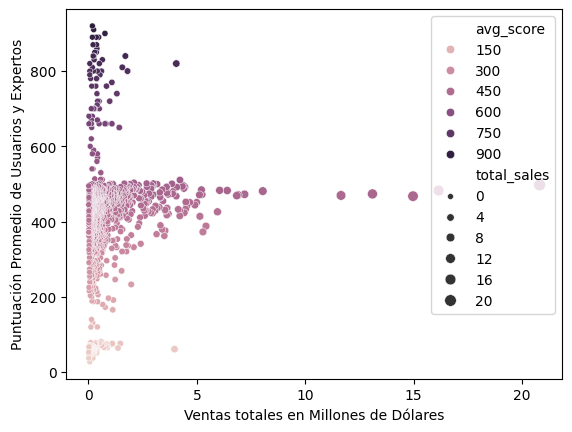

,avg_score,total_sales
avg_score,1.00000,0.14851
total_sales,0.14851,1.00000


In [128]:

df_1994_2016['avg_score'] = df_1994_2016[['user_score', 'critic_score']].mean(axis=1) # ---> Agregamos la columna avg_score al Dataframe de estudio como el promedio de ambas columnas de críticas

ps2_data = df_1994_2016[df_1994_2016['platform'] == 'PS2'] # ---> Usaremos PS2 para determinar la correlación entre las críticas promedio y el número de ventas totales.

corr_ps2_data = ps2_data[['avg_score', 'total_sales']].corr()


sns.scatterplot(data=ps2_data, x='total_sales', y= 'avg_score', hue="avg_score", size= 'total_sales')

plt.xlabel('Ventas totales en Millones de Dólares')
plt.ylabel('Puntuación Promedio de Usuarios y Expertos')



plt.show()
display(corr_ps2_data)

La correlación no es fuerte para determinar que las críticas en promedo afectan la totalidad o popularidad en ventas de los videojuegos. La matriz de correlación muestra que es de 0.32. Sin embargo cabe destacar que los videojuegos que tuvieron las mejores ventas sí tuvieron buenas críticas en promedio. De resto, la gran mayoría de videojuegos tuvieron ventas menores a 5 millones de dólares y su calificación promedio varía de 30 a 90 indistintamente de la suma de sus ventas.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas

                                                   name platform  \
16                                   Grand Theft Auto V      PS3   
17                        Grand Theft Auto: San Andreas      PS2   
23                                   Grand Theft Auto V     X360   
24                          Grand Theft Auto: Vice City      PS2   
29                       Call of Duty: Modern Warfare 3     X360   
...                                                 ...      ...   
16706                     Men in Black II: Alien Escape       GC   
16709  SCORE International Baja 1000: The Official Game      PS2   
16710                     Samurai Warriors: Sanada Maru      PS3   
16713                                  Spirits & Spells      GBA   
16714                               Winning Post 8 2016      PSV   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
16              2013.0      Action      7.02      9.09      0.98         3.96   
17              2004.

'Consola PS2'

count    1030.000000
mean        0.772951
std         1.328400
min         0.000000
25%         0.162500
50%         0.390000
75%         0.800000
max        20.810000
Name: total_sales, dtype: float64

'Consola X360'

count    992.000000
mean       0.795998
std        1.508438
min        0.010000
25%        0.130000
50%        0.320000
75%        0.830000
max       16.270000
Name: total_sales, dtype: float64

'Consola PS3'

count    1039.000000
mean        0.754803
std         1.448929
min         0.010000
25%         0.130000
50%         0.330000
75%         0.830000
max        21.050000
Name: total_sales, dtype: float64

C:\Users\c_ort\AppData\Local\Temp\ipykernel_31612\1579983690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "total_sales", y = "platform", data = df_1994_2016 , palette= 'pastel',  saturation = 0.9, linewidth = 1,


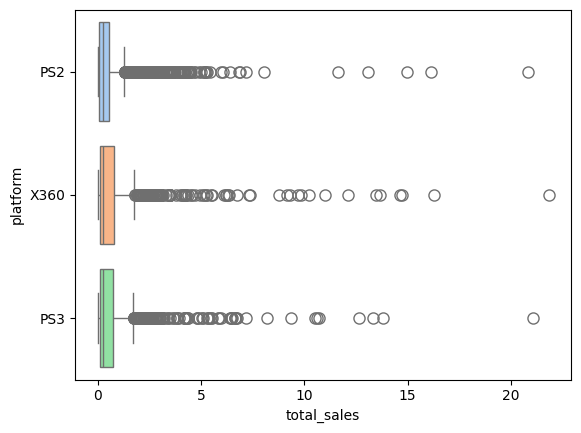

In [129]:
# Primero escogeremos los datos donde los registros de 'name' están duplicados, eso implica que dicho videojuego está en múltiples plataformas:

multi_platform = df_1994_2016[df_1994_2016['name'].duplicated(keep=False)]

print(multi_platform)

#Ahora usaremos los videojuegos registrados a las plataformas Top 3 en ventas y las almacenaremos en 3 variables distintas: 

top_1 = 'PS2'
top_2 = 'X360'
top_3 = 'PS3'

#Ahora procederemos a observar el comportamiento estadístico de las ventas por dichas plataformas:
df_top1 = multi_platform[multi_platform['platform'] == top_1]['total_sales']
df_top2 = multi_platform[multi_platform['platform'] == top_2]['total_sales']
df_top3 = multi_platform[multi_platform['platform'] == top_3]['total_sales']


display(f"Consola {top_1}", df_top1.describe())
display(f"Consola {top_2}", df_top2.describe())
display(f"Consola {top_3}", df_top3.describe())


#Finalmente graficaremos un diagrama de caja y bigote para ver su distribución de venta    
sns.boxplot(x = "total_sales", y = "platform", data = df_1994_2016 , palette= 'pastel',  saturation = 0.9, linewidth = 1,
           fliersize = 8, order=[top_1, top_2, top_3])


plt.show()



Como podemos observar los datos arrojan comportamientos similares, especialmente en la mediana, la media de la población y hasta similaridades en las desviaciones estándar.
Los gráficos arrojan comportamientos similares tanto para los datos atípicos como para los datos dentro de la distribución normal de la muestra.

Como conclusión, los 3 diagramas de caja muestran que en las plataformas del Top 3 de mejores ventas, no varían su comportamiento de ventas totales según la plataforma a la que el videojuego pertenezca.

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [130]:
#Primero crearemos una agrupación de ventas totales por género:
genres = df_1994_2016.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

display(genres.reset_index())

,genre,total_sales
0,Action,1658.15
1,Sports,1278.42
2,Shooter,981.25
3,Role-Playing,895.60
4,Misc,784.07
5,Racing,697.40
6,Platform,640.59
7,Fighting,414.19
8,Simulation,381.98
9,Adventure,213.99


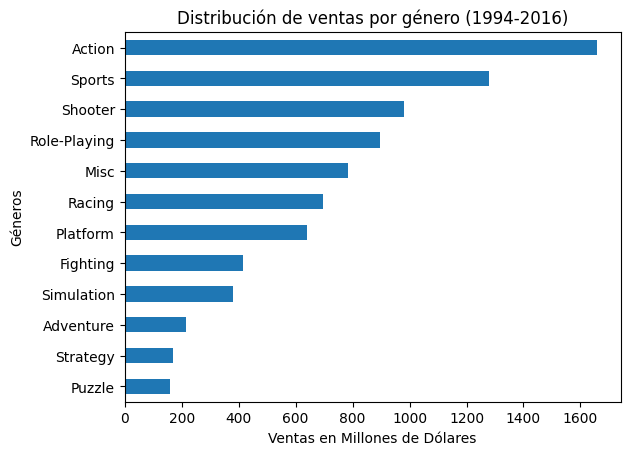

In [131]:
#Ahora visualizaremos los datos:

genres.sort_values(ascending=True).plot(kind='barh', xlabel='Ventas en Millones de Dólares', ylabel='Géneros', title='Distribución de ventas por género (1994-2016)')

plt.show()

Los videojuegos más rentables son los de **Acción (1658.15 millones), Deportes (1278.42 millones) y Shooters (981.25)** y los menos rentables son los de Puzzle, Aventuras y Estrategia (que sumados entre sí apenas alcanzan los 545.32 millones, es decir aún agrupándolos no alcanzan a llegar al Top 6). 

# Paso 4

## Para cada región (NA, UE, JP) determina:

### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [132]:
#Inicialmente guardaremos en Dataframes agrupados los top 5 de consolas con mejores ventas por región:

top_5_na = df_1994_2016.groupby('platform')['na_sales'].sum().sort_values(ascending = False)[:5].reset_index()

top_5_eu = df_1994_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)[:5].reset_index()

top_5_jp = df_1994_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)[:5].reset_index()

In [133]:
#Ahora procedemos a crear un nuevo DataFrame que almacene dicha información en 3 columnas distintas:

top_5_region_comparison = top_5_na.merge(top_5_eu, how='outer', on='platform')

top_5_region_comparison = top_5_region_comparison.merge(top_5_jp, how='outer', on='platform')

top_5_region_comparison

,platform,na_sales,eu_sales,jp_sales
0,3DS,NaN,NaN,100.62
1,DS,380.95,NaN,175.00
2,PS,NaN,212.79,139.78
3,PS2,581.01,337.06,137.63
4,PS3,392.15,328.54,80.06
5,Wii,491.57,260.75,NaN
6,X360,599.26,269.58,NaN


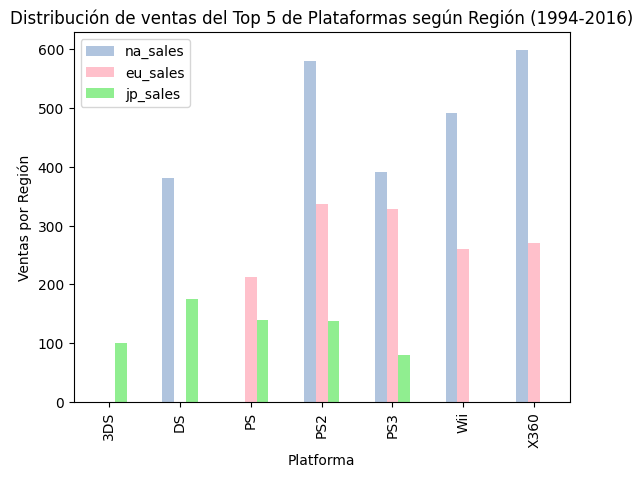

In [134]:
#Finalmente visualizamos los datos para tener una mejor comprensión de la información
top_5_region_comparison.plot(x= 'platform',
        y=['na_sales','eu_sales', 'jp_sales'],
        kind='bar',
        title= 'Distribución de ventas del Top 5 de Plataformas según Región (1994-2016)',
        xlabel= 'Platforma',
        ylabel= 'Ventas por Región',
        color= ['lightsteelblue', 'pink', 'lightgreen']
       )

plt.show()

Como podemos observar existen plataformas que fueron top 5 en unas regiones mientras que en otras no. Caso '3DS' que solo obtuvo buenas ventas en Japón, pero no en Europa ni en NorteAmérica.
Lo mismo se puede decir de 'Wii' y 'X360' que obtuvieron grandes volúmenes de ventas tanto en NorteAmérica como en Europa, sin embargo en Japón parecen no ser las plataformas preferidas para los compradores de videojuegos.
Y adicional al caso '3DS' en Europa se suma el 'DS' que tampoco suele ser la plataforma predilecta de los usuarios.

Por otro lado, las plataformas 'PS', 'PS2' y 'PS3' (que pertenecen a la compañia Sony) aparecen líderes en todas las regiones, haciendo ver entonces que Sony hizo muy buen trabajo en sus consolas a lo largo de dichas regiones.

En conclusión podemos decir entonces que los patrones de ventas difieren según la región.

### Los cinco géneros principales. Explica la diferencia

In [135]:
#Al igual que lo hecho con las regiones, procederemos a almacenar en 3 distintos DataFrames los videojuegos agrupados por género para cada región:

top_5_na_genres = df_1994_2016.groupby('genre')['na_sales'].sum().sort_values(ascending = False)[:5].reset_index()

top_5_eu_genres = df_1994_2016.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)[:5].reset_index()

top_5_jp_genres = df_1994_2016.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)[:5].reset_index()

In [136]:
#Ahora crearemos una fusión entre DataFrames para obtener los resultados en un nuevo DataFrame que almacene las 3 columnas:

top_5_genres_comparison = top_5_na_genres.merge(top_5_eu_genres, on= 'genre', how='outer')

top_5_genres_comparison = top_5_genres_comparison.merge(top_5_jp_genres, on= 'genre', how='outer')

top_5_genres_comparison

,genre,na_sales,eu_sales,jp_sales
0,Action,820.52,507.50,147.93
1,Misc,398.88,211.05,100.21
2,Platform,NaN,NaN,84.07
3,Racing,343.93,231.58,NaN
4,Role-Playing,NaN,NaN,321.40
5,Shooter,533.71,312.83,NaN
6,Sports,664.02,371.28,109.85


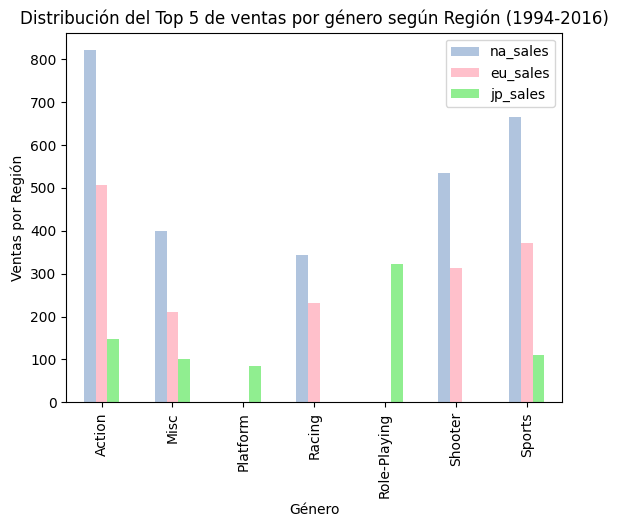

In [137]:
#Finalmente visualizamos los datos para tener una mejor comprensión de la información:

top_5_genres_comparison.plot(x= 'genre',
        y=['na_sales','eu_sales', 'jp_sales'],
        kind='bar',
        title= 'Distribución del Top 5 de ventas por género según Región (1994-2016)',
        xlabel= 'Género',
        ylabel= 'Ventas por Región',
        color= ['lightsteelblue', 'pink', 'lightgreen']
       )
plt.show()

En este caso podemos ver que el comportamiento de compra de los usuarios en Japón tienen gustos muy particulares respecto a los de las regiones de NorteAmérica y Europa. Mientras que en NorteAmérica y Europa los géneros de Role-Playing y Platform no son populares, para Japón sí, tanto así que Role-Playing es el género que más ventas obtuvo en Japón. Por otro lado, los géneros que son populares en cada región son los de Acción, Deportes, y Misc, confirmando así que en el total de ventas globales los juegos de Acción y Sports hacen parte del Top 2 en ventas globales por género, como se mostró anteriormente. Los juegos de Shooter (Número 3 en ventas globales) concentra su volumen de ventas principalmente en NorteAmérica y Europa.
Finalmente, se destaca que el Top 5 de ventas por género en NorteAmérica coincide con el Top 5 de ventas por género en Europa (No en el mismo orden, pero sí coinciden los mismos géneros).

Al igual que las ventas según las plataformas, los géneros también varían según la región.

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [138]:
#Al igual que los dos ejercicios anteriores, agrupamos y almacenamos en DataFrames separados el Top 5 en ventas

ESRB_na_ratings = df_1994_2016.groupby('rating')['na_sales'].sum().sort_values(ascending = False).reset_index()

ESRB_eu_ratings = df_1994_2016.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).reset_index()

ESRB_jp_ratings = df_1994_2016.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).reset_index()

In [139]:
#Luego crearemos un nuevo DataFrame con la fusión de los ratings ESRB creados en el paso anterior:

ESRB_ratings_comparison = ESRB_na_ratings.merge(ESRB_eu_ratings, how='outer', on='rating')

ESRB_ratings_comparison = ESRB_ratings_comparison.merge(ESRB_jp_ratings, how='outer', on='rating')

ESRB_ratings_comparison

,rating,na_sales,eu_sales,jp_sales
0,AO,1.26,0.61,0.00
1,E,1281.78,707.39,198.01
2,E10+,349.25,185.83,40.20
3,EC,1.53,0.11,0.00
4,K-A,2.56,0.27,1.46
5,M,745.25,482.23,64.22
6,RP,0.00,0.03,0.00
7,T,755.57,424.59,150.71
8,Unknown,904.61,552.76,650.89


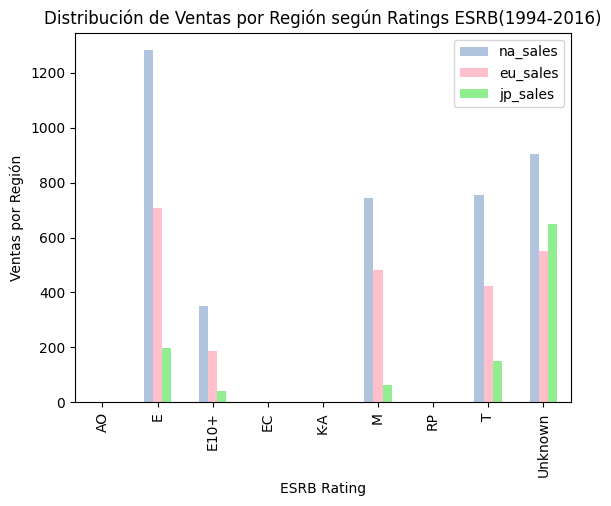

In [140]:
#Finalmente visualizamos los datos para tener una mejor comprensión de la información:

ESRB_ratings_comparison.plot(x= 'rating',
        y=['na_sales','eu_sales', 'jp_sales'],
        kind='bar',
        title= 'Distribución de Ventas por Región según Ratings ESRB(1994-2016)',
        xlabel= 'ESRB Rating',
        ylabel= 'Ventas por Región',
        color= ['lightsteelblue', 'pink', 'lightgreen']
       )

plt.show()

Como se puede ver, la mayoría de ratings van a la categoría 'Unknown' (a nivel global) predefinida en las consideraciones iniciales de registros nulos.

Por otro lado la categoría de rating 'E' (Everyone, apto para todo público) es la que lidera las ventas en NorteAmérica y Europa. Seguidas luego por 'T' (Adolescentes, Videojuegos con violencia moderada) para NorteAmérica; 'M' (Mature 17+ años) en Europa y NorteAmérica y E10+ (Todo público mayor a 10 años).

Como se puede ver (adicional a la categoría 'Unknown') la mayoría de ventas se concentran en los videojuegos con Rating tipo E, T y M a nivel región. Es posible decir que las calificaciones afectan las ventas, pero son los comportamientos por región son muy similares; es decir, **el Rating en sí afecta las ventas mas no hay variedades en su comportamiento de compra según la región.**

# Paso 5. Prueba las siguientes hipótesis:

## Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [141]:
#Primero, tomaremos una muestra de los valores para cada plataforma que tengan registros NO Nulos de calificaciones de Usuario.

df_not_null_user_score = df_1994_2016[~df_1994_2016['user_score'].isnull()]

df_not_null_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,avg_score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,800.0,E,82.54,438.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,830.0,E,35.52,456.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,800.0,E,32.77,440.0
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,850.0,E,29.80,469.5
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,660.0,E,28.91,359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,810.0,K-A,0.01,810.0
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,760.0,M,0.01,420.0
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.0,580.0,T,0.01,320.5
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.00,60.0,720.0,E10+,0.01,390.0


In [142]:
#En este caso la hipótesis nula debería considerar que: "Las calificaciones promedio de los usuarios para XOne y PC son iguales"


#Primero almacenaremos como DataFrames de muestra las calificaciones para XOne y PC:

sample_xone_user_score = df_not_null_user_score[df_not_null_user_score['platform'] == 'XOne']['user_score']

sample_pc_user_score = df_not_null_user_score[df_not_null_user_score['platform'] == 'PC']['user_score']

In [143]:
print(sample_xone_user_score.describe())
print()
print(sample_pc_user_score.describe())

count    182.000000
mean     652.142857
std      138.094056
min      160.000000
25%      580.000000
50%      680.000000
75%      750.000000
max      920.000000
Name: user_score, dtype: float64

count    760.000000
mean     707.460526
std      152.204697
min      140.000000
25%      620.000000
50%      750.000000
75%      820.000000
max      930.000000
Name: user_score, dtype: float64


In [144]:
#Ahora definiremos como hipótesis nula lo siguiente: "Las varianzas de ambas muestran son iguales"

alpha = 0.05

levene_test_variance_median = st.levene(sample_xone_user_score, sample_pc_user_score, center ='median') # ---> Prueba para determinar si las varianzas son iguales según la Mediana

levene_test_variance_mean = st.levene(sample_xone_user_score, sample_pc_user_score, center ='mean')  # ---> Prueba para determinar si las varianzas son iguales según la Media


if (levene_test_variance_median.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    
if (levene_test_variance_mean.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

No podemos rechazar la hipótesis nula
No podemos rechazar la hipótesis nula


In [145]:
#Ahora procederemos con las consideraciones estadísticas para realizar la prueba de hipótesis:

alpha = 0.05 # Nuestro alpha será de 0.05

#Almacenaremos el cálculo de la prueba t en results, considerando que las varianzas son muy similares, por ello
#usamos equal_var = True (valor default en ttest_ind). El método a utilizar es st.ttest_ind:

results = st.ttest_ind(sample_xone_user_score, sample_pc_user_score) 

print('valor p:', results.pvalue) # Imprimimos el valor p obtenido
print()

if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 8.344054885413383e-06

Rechazamos la hipótesis nula


En este caso se rechaza la hipótesis nula, debido a que el valor p es mucho menor al alpha de prueba establecido de 0.05. Lo cual quiere decir la probabilidad que los promedios de calificaciones entre XOne y PC sean iguales es muy baja.

##  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [146]:
#En este caso la hipótesis nula debería considerar que: "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes."


#Primero almacenaremos como DataFrames de muestra las calificaciones para Action y Sports con base en el DataFrame de valores no nulos en user_score:

sample_action_user_score = df_not_null_user_score[df_not_null_user_score['genre'] == 'Action']['user_score']

sample_sports_user_score = df_not_null_user_score[df_not_null_user_score['genre'] == 'Sports']['user_score']

In [147]:
print(sample_action_user_score.describe())
print()
print(sample_sports_user_score.describe())

count    1809.000000
mean      706.113875
std       142.425226
min        30.000000
25%       630.000000
50%       740.000000
75%       810.000000
max       950.000000
Name: user_score, dtype: float64

count    1088.000000
mean      695.946691
std       161.864780
min        20.000000
25%       610.000000
50%       740.000000
75%       810.000000
max       950.000000
Name: user_score, dtype: float64


In [148]:
#Ahora definiremos como hipótesis nula lo siguiente: Las varianzas de ambas muestran son iguales

alpha = 0.05

levene_test_variance_median = st.levene(sample_action_user_score, sample_sports_user_score, center ='median') # ---> Prueba para determinar si las varianzas son iguales según la Mediana

levene_test_variance_mean = st.levene(sample_action_user_score, sample_sports_user_score, center ='mean')  # ---> Prueba para determinar si las varianzas son iguales según la Media


if (levene_test_variance_median.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    
if (levene_test_variance_mean.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula
Rechazamos la hipótesis nula


In [149]:
#Ahora procederemos con las consideraciones estadísticas para realizar la prueba de hipótesis:

alpha = 0.05 # Nuestro alpha será de 0.05

#Almacenaremos el cálculo de la prueba t en results, considerando que las varianzas son distintas según los resultados de la prueba leven, por ello
#usamos equal_var = False. El método a utilizar es st.ttest_ind:

results = st.ttest_ind(sample_action_user_score, sample_sports_user_score, equal_var = False) 

print('valor p:', results.pvalue) # Imprimimos el valor p obtenido
print()

if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.08716022708637204

No podemos rechazar la hipótesis nula


En este caso no se rechaza la hipótesis nula, debido a que el valor p es mayor al alpha de prueba establecido de 0.05. Lo cual quiere decir la probabilidad que los promedios de calificaciones entre Action y Sports sean iguales está por encima del nivel de significación y dicha hipótesis simplemente no se puede rechazar.

## Comentarios sobre los métodos de prueba de hipótesis usados:

- En ambos casos se usó la prueba de Hipótesis sobre la igualdad de las medias de dos poblaciones, para probar la hipótesis de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas, aplica la función scipy.stats.ttest_ind(array1, array2, equal_var).

- Previamente a la prueba desarrollada, se establece la [Prueba Levene](https://www.statology.org/levenes-test-python/) para determinar si ambas poblaciones tienen varianzas iguales.

- Las hipótesis nulas y alternativas fueron formuladas de la siguiente forma: H0 = Los promedios de ambas muestras poblacionales son iguales. H1 = Los promedios de ambas muestras poblacionales son distintas.

# Paso 6. Escribe una conclusión general

- La mayor actividad de ventas videojuegos del Dataset reflejan la [historia de evolución en la industria de los videojuegos](https://www.fib.upc.edu/retro-informatica/historia/videojocs.html). Tal y como lo documentan los historiadores, la aparición de consolas en la década de los 80's con la tecnología de los 8 bits, máquinas de arcade y el inicio de grandes clásicos como Mario Bros, Donkey Kong y SEGA que empezaron a revolucionar el mercado. Posteriormente, con el avance tecnológico de las consolas de 16 bits y las primeras consolas de 3D, incrementaron aún más las ventas a nivel global, llevando al clímax de la industria con las [consolas de séptima y octava generación entre los años 2006 a 2016](https://es.wikipedia.org/wiki/Videoconsola#Historia) que es donde aparecen consolas de alta tecnología en la industria creando así una mega industria.

- La mayoría de plataformas más importantes en total de ventas surgieron entre 1994 y 2016 (teniendo en cuenta el histograma del comportamiento de lanzamiento de videojuegos y la columna 'videogames_release' de la variable games_per_year). Es por dicha razón, que se usó dicho espacio de tiempo para realizar el análisis.

- Las mayores ventas en diversidad de plataformas se dió entre los años 2005 a 2016 que es cuando empezaron las nuevas generaciones de consolas a establecerse en el mercado, marcando así la consolidación de las 3 grandes empresas de vieojuegos: Sony (Creadora del PS, PS2, PS3 y PS4), Nintendo (Creadora del Nintendo DS, Wii, Gameboy Advance y en la década de los 80's y 90's con el NES, el SNES y el N64) y finalmente Microsoft (Creadora del XBox, X360 y XOne).

- El top 3 de ventas lo lideran PS2, X360 y PS3, que aparecieron entre los años 2000 y 2006; plataformas que lideraron las ventas de videojuegos en todas las regiones.

- Por otro lado, las plataformas 'PS', 'PS2' y 'PS3' (que pertenecen a la compañia Sony) aparecen líderes en todas las regiones, haciendo ver entonces que Sony hizo muy buen trabajo en sus consolas a lo largo de dichas regiones.
Existen plataformas que fueron top 5 en unas regiones mientras que en otras no. Caso '3DS' que solo obtuvo buenas ventas en Japón, pero no en Europa ni en NorteAmérica. Lo mismo se puede decir de 'Wii' y 'X360' que obtuvieron grandes volúmenes de ventas tanto en NorteAmérica como en Europa, sin embargo en Japón parecen no ser las plataformas preferidas para los compradores de videojuegos. Y adicional al caso '3DS' en Europa se suma el 'DS' que tampoco suele ser la plataforma predilecta de los usuarios.

    En conclusión podemos decir entonces que los patrones de ventas difieren según la región.

- El comportamiento de compra de los usuarios en Japón tiene tendencias de muy particulares respecto a los de las regiones de NorteAmérica y Europa. Mientras que en NorteAmérica y Europa los géneros de Role-Playing y Platform no son populares, para Japón sí, tanto así que Role-Playing es el género que más ventas obtuvo en Japón. Por otro lado, los géneros que son populares en cada región son los de Acción, Deportes, y Misc, confirmando así que en el total de ventas globales los juegos de Acción y Sports hacen parte del Top 2 en ventas globales por género. Los juegos de Shooter (Número 3 en ventas globales) concentra su volumen de ventas principalmente en NorteAmérica y Europa. Finalmente, se destaca que el Top 5 de ventas por género en NorteAmérica coincide con el Top 5 de ventas por género en Europa (No en el mismo orden, pero sí coinciden los mismos géneros).

    Al igual que las ventas según las plataformas, los géneros también varían según la región.

- Tal y como se estableció en el análisis de influencia de los ratings ESRB:  **El Rating en sí afecta las ventas mas no hay variedades en su comportamiento de compra según la región.**

- La tendencia de ventas por consola de los videojuegos en promedio muestra que los juegos no alcanzan el millón de dólares en ventas. Sin embargo hay muchísimos juegos, en cada plataforma, que sobresalen muy por encima del grupo normal distribuido de ventas (muchos datos atípicos para la normalidad del resto de datos, con muchísimas ventas por sí solos). Dichos juegos son conocidos como videojuegos de culto, Best-Sellers que marcaron la industria de la plataforma donde hicieron su aparición: 832 datos atípicos que superaron la mayor distancia de Max_distance_IQR = 1.91; entre los que se encuentran títulos como Call of Duty, Wii Sports, Mario Kart Wii, Halo, Grand Theft Auto, Super Mario 64, Mario Kart 64, Gran Turismo, entre otros; que marcaron una generación de consolas como "Los más grandes títulos en la historia de los videojuegos".

- **Respecto a las pruebas de hipótesis:**
    - En el primer caso se rechaza la hipótesis nula, debido a que el valor p es mucho menor al alpha de prueba establecido de 0.05. Lo cual quiere decir la probabilidad que los promedios de calificaciones entre XOne y PC sean iguales es muy baja.
    - Mientras que en el segundo caso no se rechaza la hipótesis nula, debido a que el valor p es mayor al alpha de prueba establecido de 0.05. Lo cual quiere decir la probabilidad que los promedios de calificaciones entre Action y Sports sean iguales está por encima del nivel de significación y dicha hipótesis simplemente no se puede rechazar.